In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')
import seaborn as sns

In [2]:
df=pd.read_csv('Salary Data.csv')

In [3]:
df

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0
...,...,...,...,...,...,...
370,35.0,Female,Bachelor's,Senior Marketing Analyst,8.0,85000.0
371,43.0,Male,Master's,Director of Operations,19.0,170000.0
372,29.0,Female,Bachelor's,Junior Project Manager,2.0,40000.0
373,34.0,Male,Bachelor's,Senior Operations Coordinator,7.0,90000.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  373 non-null    float64
 1   Gender               373 non-null    object 
 2   Education Level      373 non-null    object 
 3   Job Title            373 non-null    object 
 4   Years of Experience  373 non-null    float64
 5   Salary               373 non-null    float64
dtypes: float64(3), object(3)
memory usage: 17.7+ KB


In [5]:
df.isnull().sum()

Age                    2
Gender                 2
Education Level        2
Job Title              2
Years of Experience    2
Salary                 2
dtype: int64

In [6]:
df=df.dropna()

In [7]:
df.isnull().sum()

Age                    0
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
Salary                 0
dtype: int64

In [8]:
df.duplicated().sum()

49

In [9]:
df=df.drop_duplicates()

In [10]:
df.duplicated().sum()

0

In [11]:
for column in df.columns:
    print("Unique columns:",column)
    print(df[column].unique())
    print()

Unique columns: Age
[32. 28. 45. 36. 52. 29. 42. 31. 26. 38. 48. 35. 40. 27. 44. 33. 39. 25.
 51. 34. 47. 30. 41. 37. 24. 43. 50. 46. 49. 23. 53.]

Unique columns: Gender
['Male' 'Female']

Unique columns: Education Level
["Bachelor's" "Master's" 'PhD']

Unique columns: Job Title
['Software Engineer' 'Data Analyst' 'Senior Manager' 'Sales Associate'
 'Director' 'Marketing Analyst' 'Product Manager' 'Sales Manager'
 'Marketing Coordinator' 'Senior Scientist' 'Software Developer'
 'HR Manager' 'Financial Analyst' 'Project Manager' 'Customer Service Rep'
 'Operations Manager' 'Marketing Manager' 'Senior Engineer'
 'Data Entry Clerk' 'Sales Director' 'Business Analyst' 'VP of Operations'
 'IT Support' 'Recruiter' 'Financial Manager' 'Social Media Specialist'
 'Software Manager' 'Junior Developer' 'Senior Consultant'
 'Product Designer' 'CEO' 'Accountant' 'Data Scientist'
 'Marketing Specialist' 'Technical Writer' 'HR Generalist'
 'Project Engineer' 'Customer Success Rep' 'Sales Executive' 

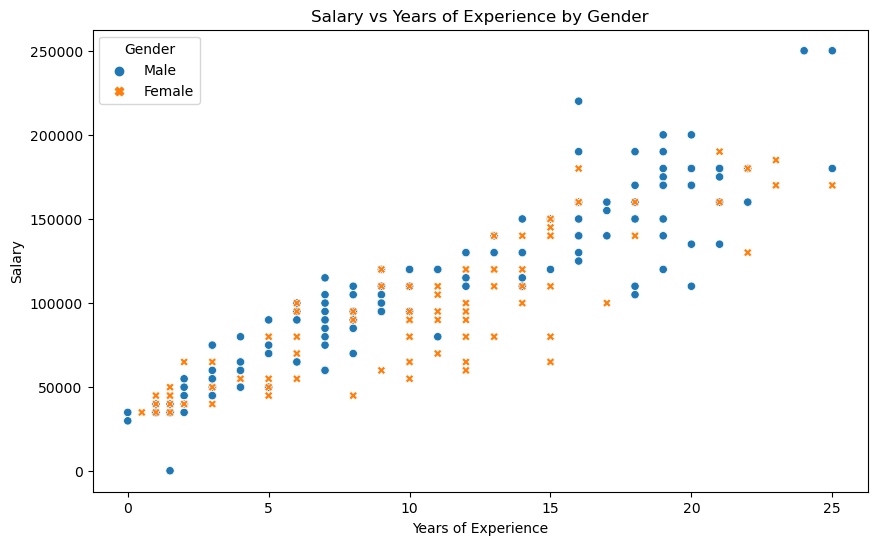

In [12]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='Years of Experience', y='Salary', hue='Gender', style='Gender')
plt.title('Salary vs Years of Experience by Gender')
plt.show()


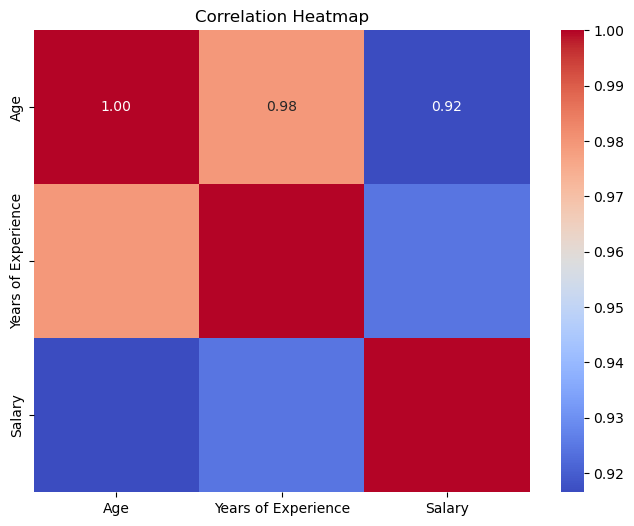

In [13]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


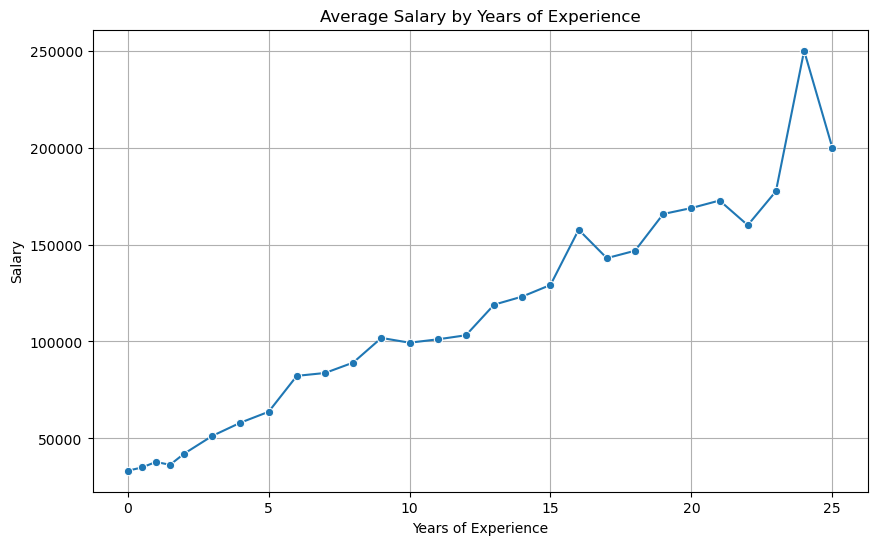

In [14]:
plt.figure(figsize=(10,6))
sns.lineplot(data=df.groupby('Years of Experience')['Salary'].mean().reset_index(),
             x='Years of Experience', y='Salary', marker='o')
plt.title('Average Salary by Years of Experience')
plt.grid(True)
plt.show()


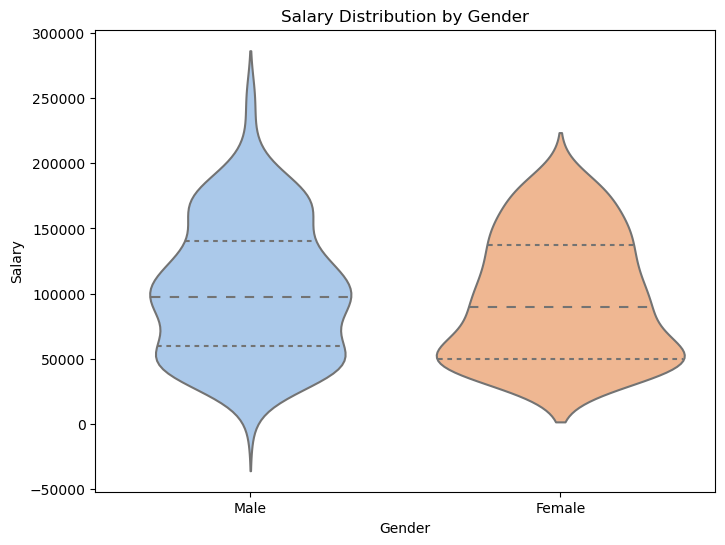

In [15]:
plt.figure(figsize=(8,6))
sns.violinplot(data=df, x='Gender', y='Salary', inner='quartile', palette='pastel')
plt.title('Salary Distribution by Gender')
plt.show()


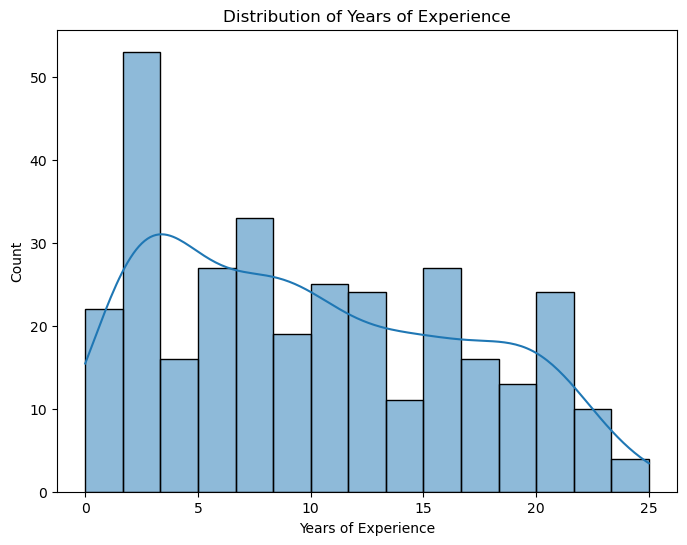

In [16]:
plt.figure(figsize=(8,6))
sns.histplot(data=df, x='Years of Experience', bins=15, kde=True)
plt.title('Distribution of Years of Experience')
plt.show()


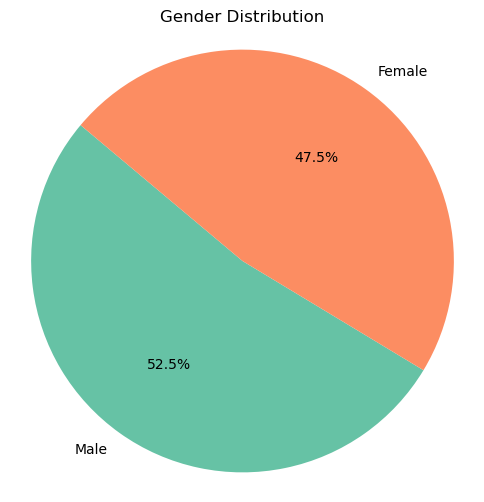

In [17]:
gender_counts = df['Gender'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("Set2"))
plt.title('Gender Distribution')
plt.axis('equal')
plt.show()


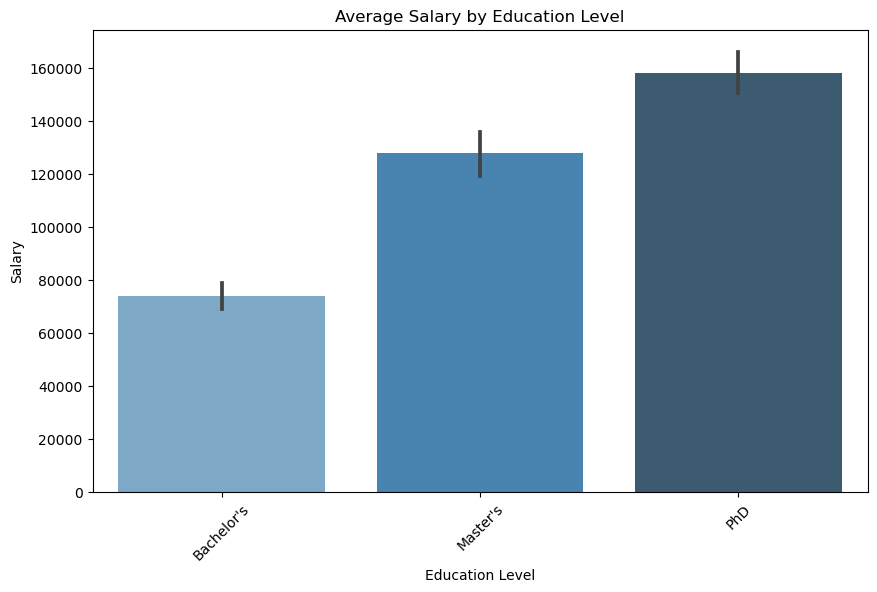

In [18]:
plt.figure(figsize=(10,6))
sns.barplot(data=df, x='Education Level', y='Salary', estimator='mean', palette='Blues_d')
plt.title('Average Salary by Education Level')
plt.xticks(rotation=45)
plt.show()


In [19]:
from sklearn.preprocessing import LabelEncoder

In [20]:
label_enc = LabelEncoder()

In [21]:
df['Gender_Label'] = label_enc.fit_transform(df['Gender'])


In [22]:
for col in ['Gender', 'Education Level', 'Job Title']:
    df[col + '_Label'] = label_enc.fit_transform(df[col])

In [23]:
df_one_hot = pd.get_dummies(df, columns=['Gender', 'Education Level', 'Job Title'], drop_first=True)


In [24]:
from sklearn.preprocessing import StandardScaler

In [25]:
scaler_std = StandardScaler()
df[['Age_Std', 'Years_of_Exp_Std', 'Salary_Std']] = scaler_std.fit_transform(
    df[['Age', 'Years of Experience', 'Salary']]
)

In [26]:
from sklearn.preprocessing import MinMaxScaler

In [27]:
scaler_minmax = MinMaxScaler()
df[['Age_MinMax', 'Years_of_Exp_MinMax', 'Salary_MinMax']] = scaler_minmax.fit_transform(
    df[['Age', 'Years of Experience', 'Salary']]
)

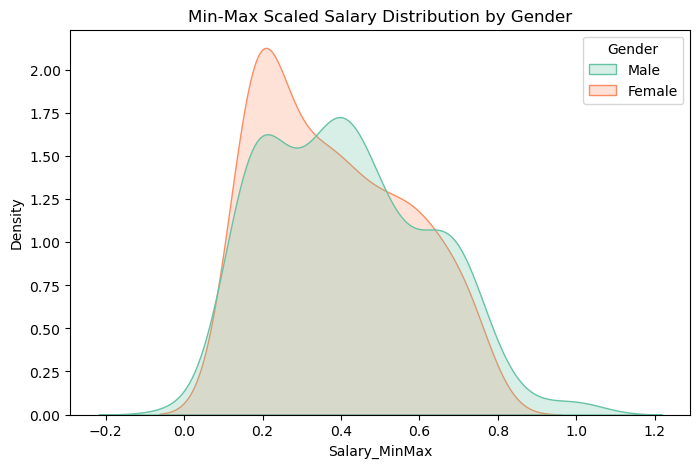

In [28]:
plt.figure(figsize=(8, 5))
sns.kdeplot(data=df, x='Salary_MinMax', hue='Gender', fill=True, common_norm=False, palette='Set2')
plt.title('Min-Max Scaled Salary Distribution by Gender')
plt.show()


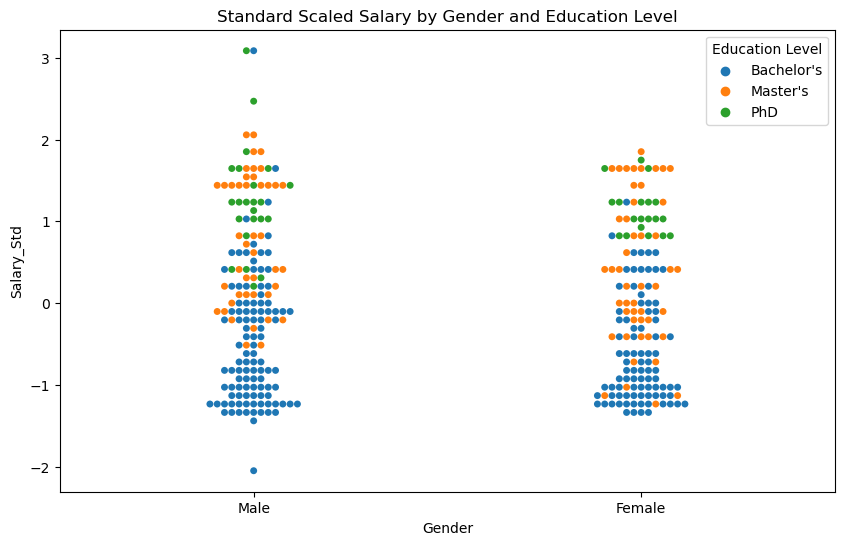

In [29]:
plt.figure(figsize=(10, 6))
sns.swarmplot(data=df, x='Gender', y='Salary_Std', hue='Education Level')
plt.title('Standard Scaled Salary by Gender and Education Level')
plt.show()


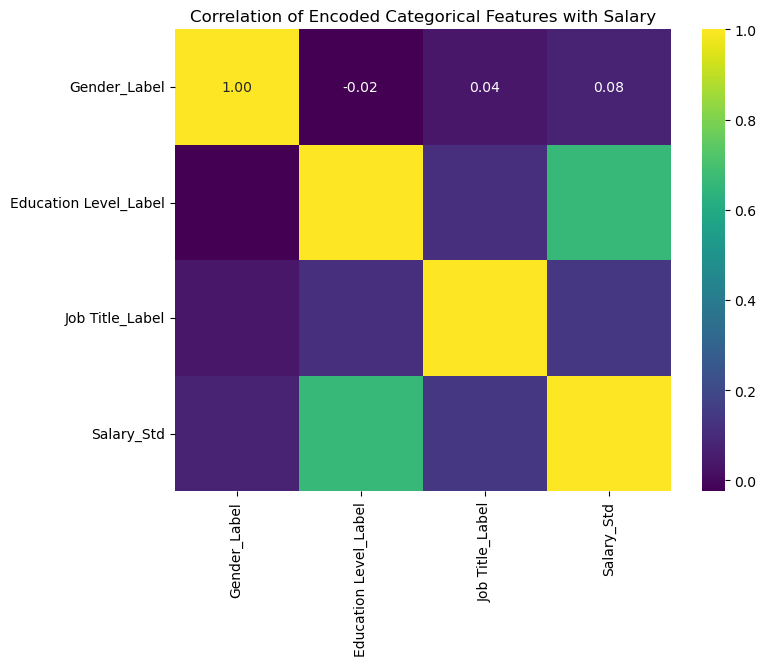

In [30]:
plt.figure(figsize=(8, 6))
encoded_cols = ['Gender_Label', 'Education Level_Label', 'Job Title_Label']
sns.heatmap(df[encoded_cols + ['Salary_Std']].corr(), annot=True, cmap='viridis', fmt='.2f')
plt.title("Correlation of Encoded Categorical Features with Salary")
plt.show()


In [31]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [32]:
le = LabelEncoder()
for column in df.columns:
    if df[column].dtype == 'object':
        df[column] = le.fit_transform(df[column])

In [33]:
X = df.drop('Salary', axis=1)
y = df['Salary']

In [34]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [36]:
def print_metrics(model_name, y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"{model_name} - MSE: {mse:.2f}, R2 Score: {r2:.2f}")

# KNN

In [37]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor()
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
print_metrics("KNN Regressor", y_test, y_pred_knn)

KNN Regressor - MSE: 101323076.92, R2 Score: 0.95


# Linear Regression

In [38]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
print_metrics("Linear Regression", y_test, y_pred_lr)

Linear Regression - MSE: 0.00, R2 Score: 1.00


# SVM

In [39]:
from sklearn.svm import SVR
svr = SVR()
svr.fit(X_train, y_train)
y_pred_svr = svr.predict(X_test)
print_metrics("Support Vector Regression", y_test, y_pred_svr)

Support Vector Regression - MSE: 1887070667.45, R2 Score: 0.00


# Decisison Tree

In [40]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
print_metrics("Decision Tree Regressor", y_test, y_pred_dt)


Decision Tree Regressor - MSE: 1153846.15, R2 Score: 1.00


# Random forest

In [41]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print_metrics("Random Forest Regressor", y_test, y_pred_rf)

Random Forest Regressor - MSE: 548538.46, R2 Score: 1.00


# Ada Boost

In [42]:
from sklearn.ensemble import AdaBoostRegressor
ab = AdaBoostRegressor()
ab.fit(X_train, y_train)
y_pred_ab = ab.predict(X_test)
print_metrics("AdaBoost Regressor", y_test, y_pred_ab)

AdaBoost Regressor - MSE: 5623133.14, R2 Score: 1.00


# Gradient Boost

In [43]:
from sklearn.ensemble import GradientBoostingRegressor
gb = GradientBoostingRegressor()
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)
print_metrics("Gradient Boosting Regressor", y_test, y_pred_gb)

Gradient Boosting Regressor - MSE: 385471.49, R2 Score: 1.00


# XG Boost

In [44]:
from xgboost import XGBRegressor
xgb = XGBRegressor()
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)
print_metrics("XGBoost Regressor", y_test, y_pred_xgb)

XGBoost Regressor - MSE: 13587732.53, R2 Score: 0.99


# observation

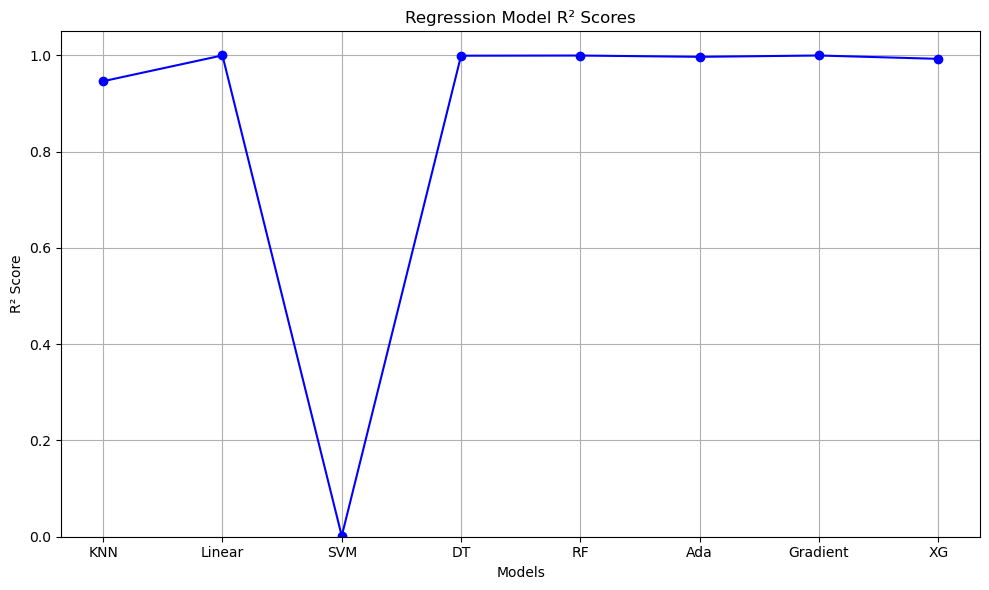

In [48]:
models = ['KNN', 'Linear', 'SVM', 'DT', 'RF', 'Ada', 'Gradient','XG']
r2_scores = [
    r2_score(y_test, y_pred_knn),         
    r2_score(y_test, y_pred_lr),          
    r2_score(y_test, y_pred_svr),        
    r2_score(y_test, y_pred_dt),         
    r2_score(y_test, y_pred_rf),          
    r2_score(y_test, y_pred_ab),     
    r2_score(y_test, y_pred_gb),
    r2_score(y_test, y_pred_xgb),
]
plt.figure(figsize=(10, 6))
plt.plot(models, r2_scores, marker='o', linestyle='-', color='b')
plt.title('Regression Model R² Scores')
plt.xlabel('Models')
plt.ylabel('R² Score')
plt.ylim(0, 1.05)
plt.grid(True)
plt.tight_layout()
plt.show()
